In [159]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as pl

In [13]:
X,y=make_blobs(random_state=0)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
logreg=LogisticRegression().fit(X_train,y_train)

In [15]:
logreg.score(X_test,y_test)

0.88

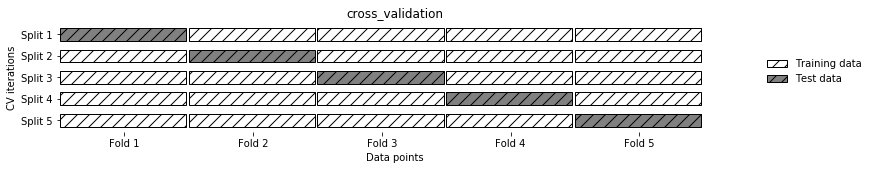

In [19]:
import mglearn
mglearn.plots.plot_cross_validation()

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

In [21]:
iris=load_iris()
logreg=LogisticRegression()

In [70]:
scores=cross_val_score(logreg,iris.data,iris.target,cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [71]:
scores.mean()

0.9733333333333334

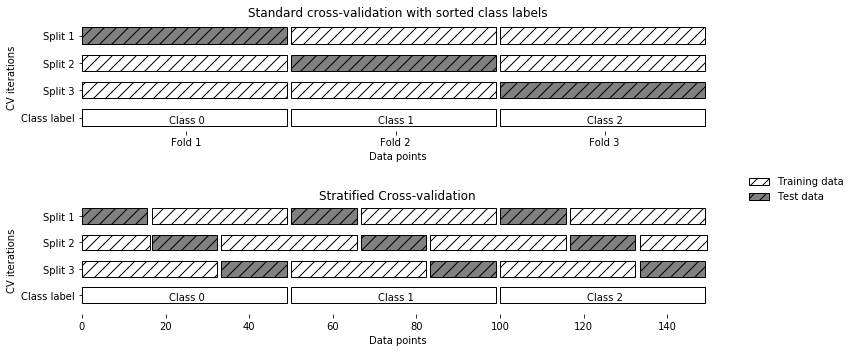

In [62]:
mglearn.plots.plot_stratified_cross_validation()

In [63]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)

In [69]:
score=cross_val_score(logreg,iris.data,iris.target,cv=kfold)
score

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [67]:
score.mean()

0.9266666666666665

In [76]:
# here there are 3 targets and each target having 1 fold so doesnt learn
# anything
kfold=KFold(n_splits=3)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0., 0., 0.])

In [88]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0.98, 0.96, 0.96])

In [90]:
from sklearn.model_selection import LeaveOneOut
lo=LeaveOneOut()
scores=cross_val_score(logreg,iris.data,iris.target,cv=lo)
scores,scores.mean(),len(scores)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 0.9666666666666667,
 150)

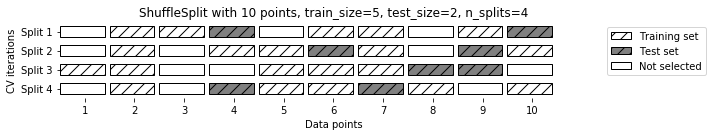

In [91]:
mglearn.plots.plot_shuffle_split()

In [92]:
from sklearn.model_selection import ShuffleSplit
shuffle_split=ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores=cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)
scores

array([0.98666667, 0.92      , 0.98666667, 0.96      , 0.96      ,
       0.97333333, 0.94666667, 0.96      , 0.93333333, 0.93333333])

In [93]:
import numpy as np
import pandas as pd
np.mean(scores)

0.9560000000000001

In [94]:
from sklearn.model_selection import GroupKFold
X,y=make_blobs(n_samples=12,random_state=0)

In [98]:
groups=[0,0,0,1,1,1,1,2,2,3,3,3]

In [99]:
cross_val_score(logreg,X,y,groups,cv=GroupKFold(n_splits=3))

array([0.75      , 0.6       , 0.66666667])

In [103]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_test,y_test)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}

In [105]:
best_score,best_parameters

(0.9736842105263158, {'C': 100, 'gamma': 0.001})

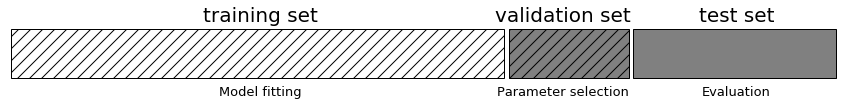

In [106]:
mglearn.plots.plot_threefold_split()

In [109]:
from sklearn.svm import SVC
X_trainval,X_test,y_trainval,y_test=train_test_split(iris.data,iris.target,
                                                    random_state=0)
X_train,X_valid,y_train,y_valid=train_test_split(X_trainval,y_trainval,
                                                random_state=1)
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_valid,y_valid)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}

In [110]:
best_score,best_parameters

(0.9642857142857143, {'C': 10, 'gamma': 0.001})

In [113]:
svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
svm.score(X_test,y_test)

0.9210526315789473

In [114]:
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        scores=cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score=np.mean(scores)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

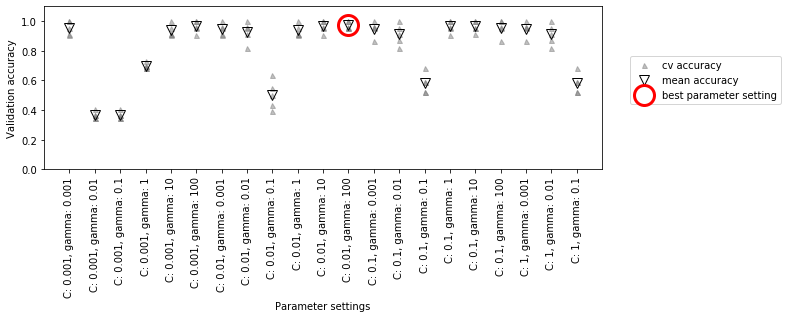

In [115]:
mglearn.plots.plot_cross_val_selection()

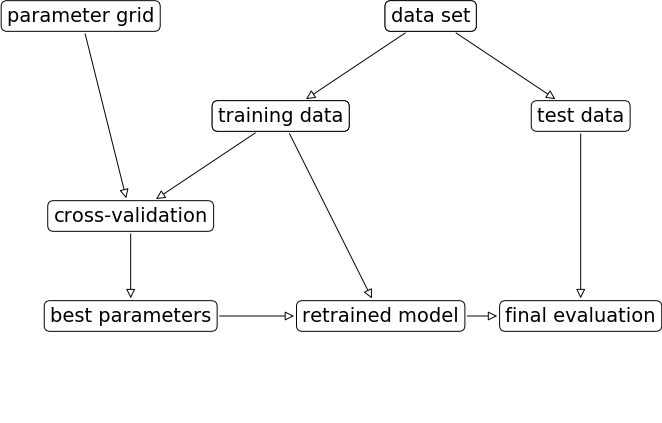

In [119]:
mglearn.plots.plot_grid_search_overview()

In [120]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [121]:
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(SVC(),param_grid,cv=5)

In [171]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,
                                              random_state=0)

In [123]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [124]:
gridsearch.score(X_test,y_test)

0.9736842105263158

In [129]:
gridsearch.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [131]:
gridsearch.best_params_

{'C': 10, 'gamma': 0.1}

In [132]:
gridsearch.best_score_

0.9731225296442687

In [134]:
gridsearch.classes_

array([0, 1, 2])

In [135]:
gridsearch.cv_results_

{'mean_fit_time': array([0.0006103 , 0.00059929, 0.00079665, 0.0003983 , 0.00019469,
        0.00079794, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00059791, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00059853, 0.        , 0.        ,
        0.00039887, 0.        , 0.00039983, 0.00079117, 0.00079794,
        0.00019889, 0.00019999, 0.00059853, 0.00079894, 0.00079618,
        0.00019946, 0.00039873, 0.00039806, 0.00039916, 0.00039883,
        0.00079846]),
 'std_fit_time': array([0.00049845, 0.00048972, 0.00039833, 0.00048782, 0.00038939,
        0.00039897, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00048819, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0004887 , 0.        , 0.        ,
        0.00048852, 0.        , 0.00048969, 0.00039577, 0.00039899,
        0.00039778, 0.00039997, 0.00048869, 0.00039949, 0.00039812,
        0.00039892, 0.00048834, 0.00048753, 0.00048887, 0.000

In [136]:
results=pd.DataFrame(gridsearch.cv_results_)

In [147]:
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000610,0.000498,0.000394,0.000483,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000599,0.000490,0.000398,0.000488,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000797,0.000398,0.000000,0.000000,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000398,0.000488,0.000205,0.000409,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000195,0.000389,0.000200,0.000400,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


In [148]:
scores = np.array(results.mean_test_score).reshape(6, 6)

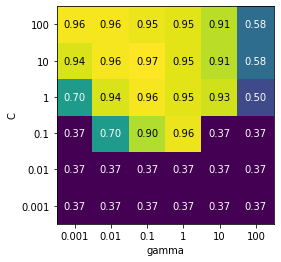

In [149]:
mglearn.tools.heatmap(scores,xlabel='gamma',ylabel='C',xticklabels=param_grid['gamma'],yticklabels=param_grid['C'],cmap='viridis')

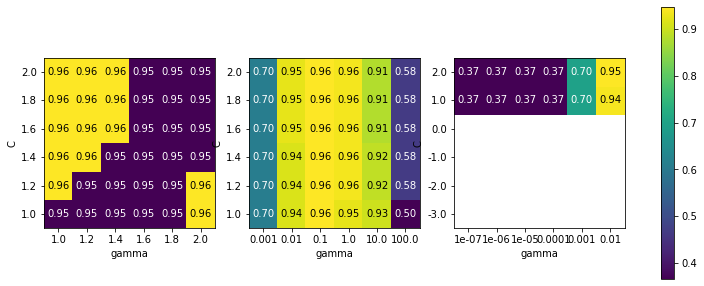

In [180]:
fig,axes=pl.subplots(1,3,figsize=(13,5))
param_grid_linear={'C':np.linspace(1,2,6),
                  'gamma':np.linspace(1,2,6)}
param_grid_one_log={'C':np.linspace(1,2,6),
                  'gamma':np.logspace(-3,2,6)}
param_grid_range={'C':np.linspace(-3,2,6),
                  'gamma':np.logspace(-7,-2,6)}
for param_grid,ax in zip([param_grid_linear,param_grid_one_log,
                          param_grid_range],axes):
    gridsearch=GridSearchCV(SVC(),param_grid,cv=5)
    gridsearch.fit(X_train,y_train)
    scores=gridsearch.cv_results_['mean_test_score'].reshape(6,6)
    scores_image=mglearn.tools.heatmap(scores,xlabel='gamma',
                                      ylabel='C',
                                      xticklabels=param_grid['gamma'],
                                      yticklabels=param_grid['C'],
                                      cmap='viridis',ax=ax)
pl.colorbar(scores_image,ax=axes.tolist())

In [181]:
param_grid = [{'kernel': ['rbf'],
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
{'kernel': ['linear'],
'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [182]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [183]:
results=pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000405216,0.000792313,0.0010036,0.000997162,0,0.000608873,0.00099926,0.000997305,0.000997305,0.000797367,...,0.000198603,0.000200081,0.000598621,0.000797987,0.000199986,0.000598383,0.000399113,0.000398827,0.000399446,0.000193262
std_fit_time,0.000496433,0.000396536,1.13329e-05,1.99615e-05,0,0.000497247,3.79198e-06,1.97303e-05,2.29373e-05,0.000398685,...,0.000397205,0.000400162,0.000488773,0.000398994,0.000399971,0.000488585,0.000488811,0.000488463,0.00048922,0.000386524
mean_score_time,0.000204182,0.000200319,0,0,0,0.000399113,0,0,0,0,...,0.000199509,0.000597429,0.000398731,0.000399637,0,0.000199938,0.000199795,0,0.000199509,0.000200224
std_score_time,0.000408363,0.000400639,0,0,0,0.000488812,0,0,0,0,...,0.000399017,0.000487804,0.000488344,0.000489454,0,0.000399876,0.00039959,0,0.000399017,0.000400448
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,0.956522,0.869565,0.521739,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1,0.956522
